<a name='page-top'></a>
### Pricing Variable Annuity Contracts by Monte Carlo Simulations

#### Data from a dataset of pricing parameters

<ol>
  <li><a href="#load-dataset-functions">Loading data from disk</a></li>
    <li><a href="#view-simul-vars">Viewing the data</a></li>
  <li><a href="#plot-simul-vars">Plotting the data</a></li>
</ol>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

import pandas as pd
import numpy as np
import os.path

## ...........................................................................
class Generic_Parameters:
    pass

print("Defined class:",Generic_Parameters)

## ...........................................................................
print("\nDONE!")

Defined class: <class '__main__.Generic_Parameters'>

DONE!


<a name='load-dataset-functions'></a>
###  Functions used to <font color='darkcyan'>load</font> data from a <font color='darkmagenta'>dataset</font> of pricing parameters

  <a href='#page-top'>page-top</a>
&nbsp;
| <a href='#load-dataset'>load-data</a>
| <a href='#plot-simul-vars'>plot-graphics</a>

In [2]:
## ...........................................................................
def reshape_dataframe_from_dataset(df):
    df.drop(columns=df.columns[0],axis=1,inplace=True)
    new_colums = {k:k-1 for k in df.columns}
    df.rename(columns=new_colums,inplace=True)

print("Defined function:",reshape_dataframe_from_dataset)

## ...........................................................................
def data_from_dataset__gmdb_gmib_total(outputs,gftype,in_file,verbose=False):
    if verbose:
        print("\tdata for: %s-total..." %(gftype.upper()))
    outputs.total = pd.read_excel(in_file,sheet_name=gftype.upper()+'-total',
                                  skiprows=1,index_col=None,header=None)
    reshape_dataframe_from_dataset(outputs.total)

print("Defined function:",data_from_dataset__gmdb_gmib_total)

## ...........................................................................
def data_from_dataset__gmdb_gmib_reset(outputs,gftype,in_file,verbose=False):
    if verbose:
        print("\tdata for: %s-reset..." %(gftype.upper()))
    outputs.reset = pd.read_excel(in_file,sheet_name=gftype.upper()+'-reset',
                        skiprows=1,index_col=None,header=None)
    reshape_dataframe_from_dataset(outputs.reset)

print("Defined function:",data_from_dataset__gmdb_gmib_reset)

## ...........................................................................
def data_from_dataset__gmdb_gmib_rollup(outputs,gftype,in_file,verbose=False):
    if verbose:
        print("\tdata for: %s-rollup..." %(gftype.upper()))
    outputs.rollup = pd.read_excel(in_file,sheet_name=gftype.upper()+'-rollup',
                        skiprows=1,index_col=None,header=None)
    reshape_dataframe_from_dataset(outputs.rollup)

print("Defined function:",data_from_dataset__gmdb_gmib_rollup)

## ...........................................................................
def extract_data_from_dataset__gmdb_gmib(outputs,in_file,verbose=False):
    for gftype in ['gmdb','gmib']:
        if verbose:
            print("Extracting data for: %s..." %(gftype.upper()))
        ####
        gfund = Generic_Parameters()
        ####
        data_from_dataset__gmdb_gmib_rollup(gfund,gftype,in_file,
                                            verbose=verbose)        
        data_from_dataset__gmdb_gmib_reset(gfund,gftype,in_file,
                                           verbose=verbose)
        data_from_dataset__gmdb_gmib_total(gfund,gftype,in_file,
                                           verbose=verbose)
        ####
        if (gftype == 'gmdb'):
            outputs.gmdb = gfund
        else:
            outputs.gmib = gfund

print("Defined function:",extract_data_from_dataset__gmdb_gmib)

## ...........................................................................
def extract_data_from_dataset__total_fund(outputs,input_file,verbose=False):
    if verbose:
        print("Extracting data for: total fund...")
    ####
    df = pd.read_excel(input_file,sheet_name='Total-Fund',skiprows=1,
                                        index_col=None,header=None)
    reshape_dataframe_from_dataset(df)    
    outputs.total_fund = df

print("Defined function:",extract_data_from_dataset__total_fund)

## ...........................................................................
def extract_data_from_dataset(filename,verbose=False):
    xlsx_file  = pd.ExcelFile(filename)
    outputs    = Generic_Parameters()
    ####
    extract_data_from_dataset__total_fund(outputs,xlsx_file,verbose)
    extract_data_from_dataset__gmdb_gmib (outputs,xlsx_file,verbose)
    ####
    return outputs

print("Defined function:",extract_data_from_dataset)

## ...........................................................................
print("\nDONE!")

Defined function: <function reshape_dataframe_from_dataset at 0x12f0482c0>
Defined function: <function data_from_dataset__gmdb_gmib_total at 0x12f048680>
Defined function: <function data_from_dataset__gmdb_gmib_reset at 0x12f0487c0>
Defined function: <function data_from_dataset__gmdb_gmib_rollup at 0x12f048720>
Defined function: <function extract_data_from_dataset__gmdb_gmib at 0x12f048860>
Defined function: <function extract_data_from_dataset__total_fund at 0x12f048900>
Defined function: <function extract_data_from_dataset at 0x12f0489a0>

DONE!


<a name='load-dataset'></a>
###  <font color='darkmagenta'>Loading</font> data from the <font color='darkcyan'>dataset</font> of pricing parameters

  <a href='#page-top'>page-top</a>
&nbsp;
| Goto:
  <a href='#load-dataset-functions'><font color='darkred'>functions</font></a>
| <a href='#view-simul-vars'>view-data</a>
| <a href='#plot-simul-vars'>plot-grahics</a>

In [3]:
#files_location    = "C:\\NJZ\\AIMS-Master-Promise\\outputs\\datasets\\"
files_location    = "/Users/promise/Documents/"

dataset_name      = "sample_dataset_001"
dataset_filename  = files_location + dataset_name + ".xlsx"

print("Dataset files location:\n",files_location)
print("Dataset file name     :\n",dataset_filename + '\n')

line_sep = str.join('',['='*50])
print(line_sep)
print("Loading data from dataset of pricing parameters")
print(line_sep)

dset_data = extract_data_from_dataset(dataset_filename,verbose=True)

print("\nDONE!")

Dataset files location:
 /Users/promise/Documents/
Dataset file name     :
 /Users/promise/Documents/sample_dataset_001.xlsx

Loading data from dataset of pricing parameters
Extracting data for: total fund...
Extracting data for: GMDB...
	data for: GMDB-rollup...
	data for: GMDB-reset...
	data for: GMDB-total...
Extracting data for: GMIB...
	data for: GMIB-rollup...
	data for: GMIB-reset...
	data for: GMIB-total...

DONE!


<a name='view-simul-vars'></a>
###  <font color='darkmagenta'>Viewing</font> the data from the <font color='darkcyan'>dataset</font> of pricing parameters

  <a href='#page-top'>page-top</a>
&nbsp;
| <a href='#view-simul-vars-matrix'>matrix-format</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#plot-simul-vars'>plot-graphics</a>

In [4]:
df = dset_data.total_fund
df = dset_data.gmdb.rollup
df = dset_data.gmdb.reset
df = dset_data.gmdb.total
df = dset_data.gmib.rollup
df = dset_data.gmib.reset
df = dset_data.gmib.total
####
df = df.applymap("{:,.2f}".format)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
995,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,831.37"
996,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","14,445.89"
997,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,911.57"
998,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07"
999,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99"


In [5]:
df = dset_data.total_fund
df = dset_data.gmdb.rollup
df = dset_data.gmdb.reset
df = dset_data.gmdb.total
df = dset_data.gmib.rollup
df = dset_data.gmib.reset
df = dset_data.gmib.total
####
df = df.applymap("{:,.2f}".format)
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,240
995,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,825.05","7,831.37"
996,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","12,164.87","14,445.89"
997,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,563.04","3,911.57"
998,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07","10,985.07"
999,"1,000.00","1,003.34","1,006.69","1,010.05","1,013.42","1,016.81","1,020.20","1,023.61","1,027.03","1,030.45",...,"14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99","14,587.99"


<a name='view-simul-vars-matrix'></a>
###  Viewing the data in <font color='darkmagenta'>matrix</font>-format

  <a href='#page-top'>page-top</a>
&nbsp;
| <a href='#view-simul-vars'>dataframe-data</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#plot-simul-vars'>plot-graphics</a>

In [6]:
matrix_data  = dset_data.total_fund.values

scen_id      =  3  ## which scenario (row) to view
n_months     = 15  ## how many months to show

print("Total-fund: first %d month(s) of data for" %(n_months) \
          + " scenario #%d\n" %(scen_id+1))
## use "n_months+1": to include t=0 (issue date)
print(matrix_data[scen_id,:n_months+1])

print("\nDONE!")

Total-fund: first 15 month(s) of data for scenario #4

[1000.         1067.987726   1075.76831287 1265.34575816 1206.22806056
 1170.3687488  1218.89727656 1213.86109196 1266.19252312 1343.74021797
 1331.10702636 1282.47887096 1279.65559488 1199.59252776 1200.05122718
 1166.92979445]

DONE!


In [7]:
print("Total-fund: last %d month(s) of data for" %(n_months) \
          + " scenario #%d\n" %(scen_id+1))

print(matrix_data[scen_id,-n_months:])

print("\nDONE!")

Total-fund: last 15 month(s) of data for scenario #4

[2425.06704341 2480.26708192 2389.71031627 2324.42215553 2298.70012215
 2349.53242097 2366.03274403 2424.86260854 2529.27543171 2461.37500748
 2561.80103539 2577.0338862  2497.35830998 2418.00234044 2342.39033951]

DONE!


<a name='plot-simul-vars'></a>
<a name='plot-simul-vars-def-ylimits'></a>
### Plot <font color='darkmagenta'>simulation variables</font>: (<font size=2.5>definition of Y-axis limits</font>)

  <a href='#page-top'>page-top</a>
&nbsp;
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-total-and-guar-funds'>total + guar.</a>
&nbsp;
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

In [8]:
print("Defining: Y-axis limits for the graphics to generate.")

## for each triplet (y1,y2,dy): the Y-axis will show values from y1 to y2
## with a dy intervall
## e.g. (1000,4500,300): Y-axis wil show: 1000, 1300, 1600, 1900, ... , 4500

ylimits = [ (1000,4500,300),( 700,4200,300),( 800, 3600,250),(1000,3300,200),
            ( 600,3100,300),(1000,6000,350),(1000,11000,700),(1000,3500,200),
            (1000,9500,700),(1000,9000,700)]

print("\nDONE!")

Defining: Y-axis limits for the graphics to generate.

DONE!


<a name='plot-simul-vars-def-fig-params'></a>
### Plot <font color='darkmagenta'>simulation variables</font>: (<font size=2.5>defining fig. parameters</font>)

  <a href='#page-top'>page-top</a>
&nbsp;
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-total-and-guar-funds'>total + guar.</a>
&nbsp;
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

In [9]:
print("(Selecting which scenario to plot) & (initializing fig::parameters)")

fig_params          = Generic_Parameters()
fig_params.scen_id  = 3 ## NB: change  this value
                        ## in order to plot a different scenario
fig_params.figsize  = (8,3.5)

## number of months of data in each matrix
T = len(dset_data.total_fund.columns)

reset_freq = 18 ## GMDB reset frequency
T = len(dset_data.total_fund.columns)  ## number culumns in each matrix
## months where there is a reset
fig_params.gmib_reset_dates = [k for k in range(0,T,reset_freq)]

#### values to show on the X-axis
fig_params.xaxis_values     = (range(0,T,20)) ## x := 0, 20, 40, ..., T

#### values to show on the Y-axis
ylim  = ylimits[fig_params.scen_id] ## values  corresponding to: scen_id
fig_params.yaxis_values     = range(ylim[0],ylim[1],ylim[2])
####
fig_params.xaxis_label      = "Time ellapsed since issue date; in month(s)"
####
fig_params.save_graphics    = True  ## if True, all graphics will be saved to files
                                    ## set to False to prevent graphics fom been saved!
fig_params.files_location   = "Promise"

print("\n>> DONE!")

(Selecting which scenario to plot) & (initializing fig::parameters)

>> DONE!


<a name='plot-total-fund'></a>
### Plot <font color='darkmagenta'>simulation variables</font> -  <font color='darkcyan'>total fund</font>

<a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-funds'>total + guar.</a>
&nbsp;
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

Saving graphics to file:
 Promisetotal-fund.png
DONE!


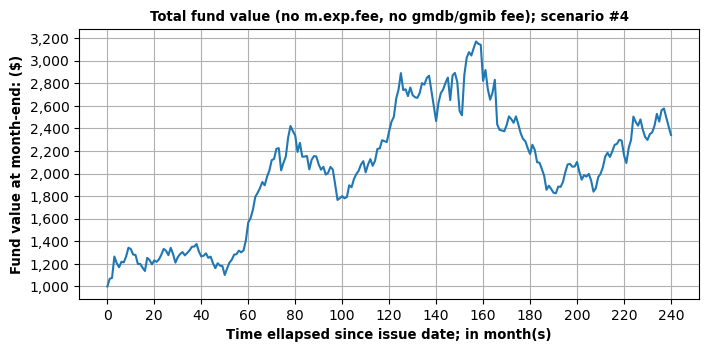

In [10]:
plt.figure(figsize=fig_params.figsize)
####
plt.plot(dset_data.total_fund.values[fig_params.scen_id])
plt.xticks(fig_params.xaxis_values) ## set values on the X-axis
plt.yticks(fig_params.yaxis_values) ## set values on the Y-axis
####
ax = plt.gca()  ## the code below does show values with a coma as thousands' separator
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) ## and only 2 decmals
####
title = "Total fund value (no m.exp.fee, no gmdb/gmib fee);" \
                    + " scenario #%d" %(fig_params.scen_id+1)
plt.title(title,fontweight='bold',fontsize=9.5)
plt.xlabel(fig_params.xaxis_label,fontweight='bold',fontsize=9.5)
plt.ylabel("Fund value at month-end: ($)",fontweight='bold',fontsize=9.5)
plt.grid()
####
if (fig_params.save_graphics):
    filename = fig_params.files_location + "total-fund.png"
    print("Saving graphics to file:\n",filename)
    plt.savefig(filename,bbox_inches='tight',dpi=175)
    print("DONE!")
####
plt.show()

<a name='plot-total-and-guar-funds'></a>
<a name='plot-total-and-guar-fund-gmdb'></a>
<a name='plot-total-and-guar-fund-gmdb-rollup'></a>

### Plot:  <font color='darkcyan'>Total fund</font> and <font color='darkcyan'>GMDB</font>-<font color='darkmagenta'>rollup</font> benefit

  <a href='#page-top'>page-top</a>
&nbsp;
  <a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmdb-reset'>reset</a>
| <a href='#plot-total-and-guar-fund-gmdb-rollup-and-reset'>rollup+reset</a>
| <a href='#plot-total-and-guar-fund-gmdb-total'>total</a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmib'>GMIB</a>
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

Saving graphics to file:
 PromiseGMIB-rollup.png
DONE!


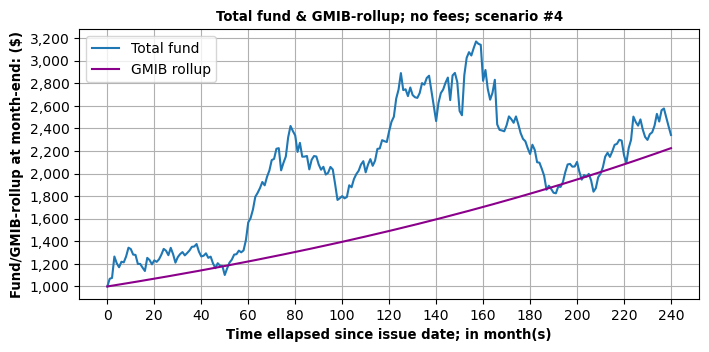

In [16]:
plt.figure(figsize=fig_params.figsize)
####
plt.plot(dset_data.total_fund.values[fig_params.scen_id],label='Total fund')
plt.plot(dset_data.gmib.rollup.values[fig_params.scen_id],
                        color='darkmagenta',label='GMIB rollup')
####
plt.xticks(fig_params.xaxis_values)
plt.yticks(fig_params.yaxis_values)
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
####
title = "Total fund & GMIB-rollup; no fees;" \
            + " scenario #%d" %(fig_params.scen_id+1)
plt.title(title,fontweight='bold',fontsize=9.5)
plt.xlabel(fig_params.xaxis_label,fontweight='bold',fontsize=9.5)
plt.ylabel("Fund/GMIB-rollup at month-end: ($)",fontweight='bold',fontsize=9.5)
####
plt.legend(loc='upper left')
plt.grid()
####
if (fig_params.save_graphics):
    filename = fig_params.files_location + "GMIB-rollup.png"
    print("Saving graphics to file:\n",filename)
    
    plt.savefig(filename,bbox_inches='tight',dpi=175)
    print("DONE!")
####
plt.show()

<a name='plot-total-and-guar-fund-gmdb-reset'></a>

### Plot:  <font color='darkcyan'>Total fund</font> and <font color='darkcyan'>GMDB</font>-<font color='darkmagenta'>reset</font> benefit

  <a href='#page-top'>page-top</a>
&nbsp;
  <a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmdb-rollup'>rollup</a>
| <a href='#plot-total-and-guar-fund-gmdb-rollup-and-reset'>rollup+reset</a>
| <a href='#plot-total-and-guar-fund-gmdb-total'>total</a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmib'>GMIB</a>
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

Saving graphics to file:
 PromiseGMIB-reset.png
DONE!


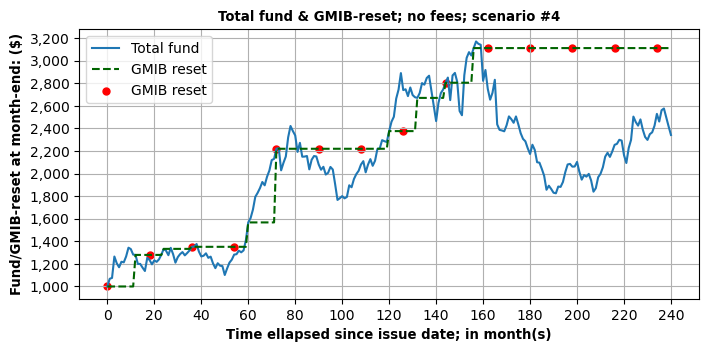

In [12]:
plt.figure(figsize=fig_params.figsize)
####
plt.plot(dset_data.total_fund.values[fig_params.scen_id],label='Total fund')
plt.plot(dset_data.gmib.reset.values[fig_params.scen_id],
         color='darkgreen',linestyle='--',label='GMIB reset')
####
x = fig_params.gmib_reset_dates
y = dset_data.gmib.reset.values[fig_params.scen_id][x]

plt.scatter(x,y,s=25,color='red',label='GMIB reset') ## s := size of the red dots
####
plt.xticks(fig_params.xaxis_values)
plt.yticks(fig_params.yaxis_values)
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
####
title = "Total fund & GMIB-reset; no fees; scenario #%d" %(fig_params.scen_id+1)
plt.title(title,fontweight='bold',fontsize=9.5)
####
plt.xlabel(fig_params.xaxis_label,fontweight='bold',fontsize=9.5)
plt.ylabel("Fund/GMIB-reset at month-end: ($)",fontweight='bold',fontsize=9.5)
####
plt.legend()
plt.grid()

if (fig_params.save_graphics):
    filename = fig_params.files_location + "GMIB-reset.png"
    print("Saving graphics to file:\n",filename)
    plt.savefig(filename,bbox_inches='tight',dpi=175)
    print("DONE!")
####
plt.show()

<a name='plot-total-and-guar-fund-gmdb-rollup-and-reset'></a>

### Plot:  <font color='darkcyan'>Total fund</font> and <font color='darkcyan'>GMDB</font>-(<font color='darkmagenta'>rollup</font>+<font color='darkmagenta'>reset</font>) benefit

  <a href='#page-top'>page-top</a>
&nbsp;
  <a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmdb-rollup'>rollup</a>
| <a href='#plot-total-and-guar-fund-gmdb-reset'>reset</a>
| <a href='#plot-total-and-guar-fund-gmdb-total'>total</a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmib'>GMIB</a>
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

Saving graphics to file:
 PromiseGMIB(rollupreset).png
DONE!


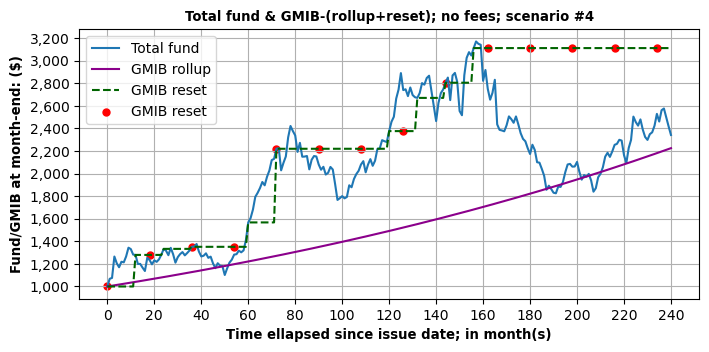

In [13]:
plt.figure(figsize=fig_params.figsize)
####
plt.plot(dset_data.total_fund.values[fig_params.scen_id],label='Total fund')
plt.plot(dset_data.gmib.rollup.values[fig_params.scen_id],
                        color='darkmagenta',label='GMIB rollup')
plt.plot(dset_data.gmib.reset.values[fig_params.scen_id],
         color='darkgreen',linestyle='--',label='GMIB reset')
####
x = fig_params.gmib_reset_dates
y = dset_data.gmib.reset.values[fig_params.scen_id][x]

plt.scatter(x,y,s=25,color='red',label='GMIB reset') ## s := size of the red dots
####
plt.xticks(fig_params.xaxis_values)
plt.yticks(fig_params.yaxis_values)
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
####
title = "Total fund & GMIB-(rollup+reset); no fees; scenario #%d" %(fig_params.scen_id+1)
plt.title(title,fontweight='bold',fontsize=9.5)
####
plt.xlabel(fig_params.xaxis_label,fontweight='bold',fontsize=9.5)
plt.ylabel("Fund/GMIB at month-end: ($)",fontweight='bold',fontsize=9.5)
####
plt.legend()
plt.grid()

if (fig_params.save_graphics):
    filename = fig_params.files_location + "GMIB(rollupreset).png"
    print("Saving graphics to file:\n",filename)
    plt.savefig(filename,bbox_inches='tight',dpi=175)
    print("DONE!")
####
plt.show()

<a name='plot-total-and-guar-fund-gmdb-total'></a>

### Plot:  <font color='darkcyan'>Total fund</font> and <font color='darkmagenta'>Total</font>-<font color='darkcyan'>GMDB</font> benefit

  <a href='#page-top'>page-top</a>
&nbsp;
  <a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmdb-rollup'>rollup</a>
| <a href='#plot-total-and-guar-fund-gmdb-reset'>reset</a>
| <a href='#plot-total-and-guar-fund-gmdb-rollup-and-reset'>rollup+reset</a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmib'>GMIB</a>
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>

Saving graphics to file:
 Promisetotal fund with GMIB benefit.png
DONE!


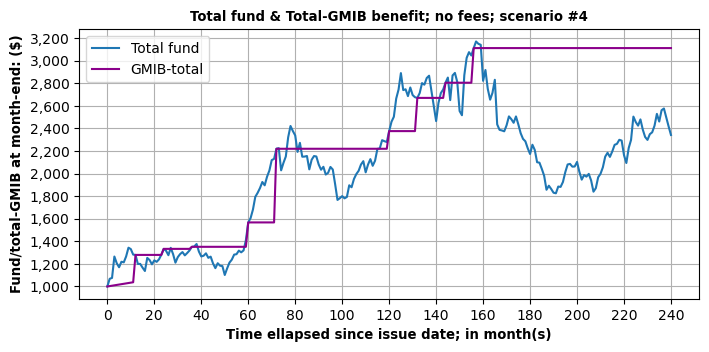

In [14]:
plt.figure(figsize=fig_params.figsize)
####
plt.plot(dset_data.total_fund.values[fig_params.scen_id],label='Total fund')
plt.plot(dset_data.gmib.total.values[fig_params.scen_id],
                        color='darkmagenta',label='GMIB-total')
####
plt.xticks(fig_params.xaxis_values)
plt.yticks(fig_params.yaxis_values)
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
####
title = "Total fund & Total-GMIB benefit; no fees; scenario #%d" %(fig_params.scen_id+1)
plt.title(title,fontweight='bold',fontsize=9.5)
####
plt.xlabel(fig_params.xaxis_label,fontweight='bold',fontsize=9.5)
plt.ylabel("Fund/total-GMIB at month-end: ($)",fontweight='bold',fontsize=9.5)
####
plt.legend(loc='upper left')
plt.grid()

if (fig_params.save_graphics):
    filename = fig_params.files_location + "total fund with GMIB benefit.png"
    print("Saving graphics to file:\n",filename)
    plt.savefig(filename,bbox_inches='tight',dpi=175)
    print("DONE!")
####
plt.show()

<a name='plot-total-and-guar-fund-gmib'></a>
<a name='plot-total-and-guar-fund-gmib-rollup'></a>

### Plot:  <font color='darkcyan'>Total fund</font> and <font color='darkcyan'>GMIB</font>-<font color='darkmagenta'>rollup</font> benefit

  <a href='#page-top'>page-top</a>
&nbsp;
  <a href="#plot-simul-vars"><font size=5><button>⇽</button></font></a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmib-reset'>reset</a>
| <a href='#plot-total-and-guar-fund-gmib-rollup-and-reset'>rollup+reset</a>
| <a href='#plot-total-and-guar-fund-gmib-total'>total</a>
&nbsp;
| <a href='#plot-total-and-guar-fund-gmdb'>GMDB</a>
| <a href='#plot-total-fund'>total-fund</a>
| <a href='#plot-simul-vars-def-ylimits'>Y-axis-limits</a>
| <a href='#plot-simul-vars-def-fig-params'>fig.-parameters</a>
| <a href='#load-dataset'>load-data</a>
| <a href='#view-simul-vars'>view-data</a>